In [1]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt
import pickle
from statsmodels.nonparametric import smoothers_lowess as lowess

#.py
from core import qlearning as q 
from core import prices as pr 


In [2]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_delta.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[[0.31741696, 0.35609251],
        [0.36946922, 0.22268881],
        [0.12374889, 0.35742997],
        ...,
        [0.26545967, 0.26545967],
        [0.26868653, 0.24643534],
        [0.26545967, 0.26545967]],

       [[0.36885559, 0.29585737],
        [0.39706165, 0.23291286],
        [0.36248322, 0.29202387],
        ...,
        [0.21894718, 0.21894718],
        [0.29871647, 0.27166108],
        [0.25071863, 0.25071863]],

       [[0.3191    , 0.17014698],
        [0.39386148, 0.17385306],
        [0.38169148, 0.1272193 ],
        ...,
        [0.30253787, 0.25121216],
        [0.21795539, 0.23497877],
        [0.25951759, 0.28423276]],

       ...,

       [[0.348903  , 0.19597966],
        [0.33011509, 0.15857185],
        [0.31741696, 0.35609251],
        ...,
        [0.24643534, 0.26868653],
        [0.27926713, 0.27926713],
        [0.29199697, 0.29199697]],

       [[0.20785624, 0.38465918],
        [0.1964421 , 0.24589853],
        [0.1306427 , 0.32399375],
        

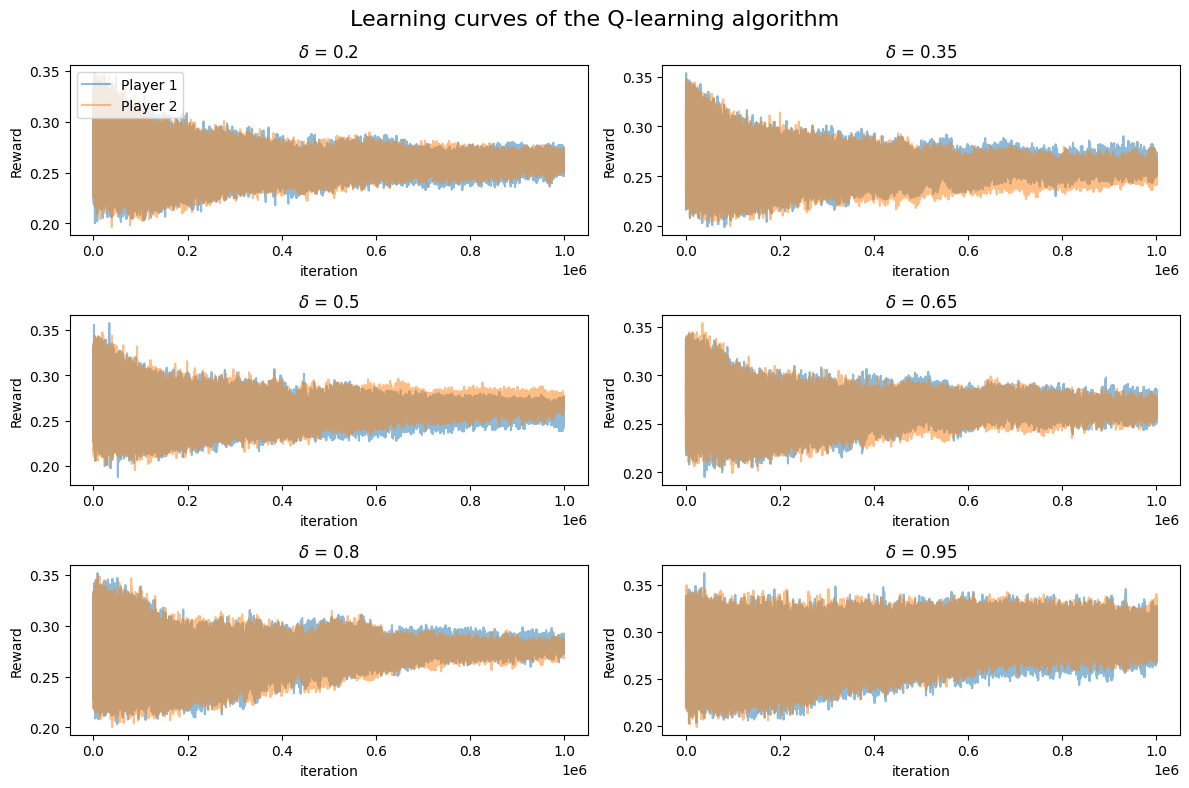

In [3]:
agg = np.array(aggregated_agents).mean(axis=1)
num_graphs = len(agg)
delta = [0.20, 0.35, 0.50, 0.65, 0.80, 0.95]

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(agg[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(agg[graph_num][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\delta$ = {delta[graph_num]}')
    
      # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend(loc='upper left') 

# Remove any unused subplots
if num_graphs < 4:
    for i in range(num_graphs, 4):
        fig.delaxes(axes[i])

# Create a legend in the first subplot
if graph_num == 0:
         # Legend in the top-left corner
        ax.spines['top'].set_visible(True)  # Show top spine
        ax.spines['right'].set_visible(True)  # Show right spine
        ax.spines['bottom'].set_visible(True)  # Show bottom spine
        ax.spines['left'].set_visible(True)  # Show left spine

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()


fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

La régression LOESS est particulièrement adaptée quand:
- Les valeurs des prédicteurs X sont discrètes ou peu denses mais la relation avec Y est lisse/continue
- Il y a de la variabilité locale dans les valeurs de Y pour un même X

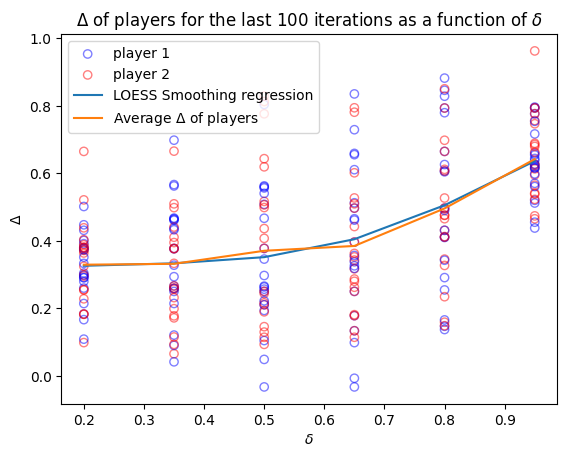

In [4]:
agg = np.array(aggregated_agents).mean(axis=1)
delta = [0.20, 0.35, 0.50, 0.65, 0.80, 0.95]
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit

    
Rmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0])))
DRmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0]))) 

agg_Rmean = np.zeros((len(aggregated_agents), 2))
agg_DRmean = np.zeros((len(aggregated_agents), 2))  

# Parameters
n_params = len(aggregated_agents)

X = []
Y = []

handles = []
labels = []
# Loop through each parameter  
for param_ind in range(n_params):

  # Loop through each sample
  for sample_ind in range(len(aggregated_agents[0])):
    for j in range (2):
      Rmean[param_ind][sample_ind][j] = aggregated_agents[param_ind][sample_ind][-100:,j].mean()
      DRmean[param_ind][sample_ind][j] = (Rmean[param_ind][sample_ind][j] - RN)/(RC - RN) 
      agg_Rmean[param_ind][j] = agg[param_ind][-100:,j].mean()
      agg_DRmean[param_ind][j] = (agg_Rmean[param_ind][j] - RN)/(RC - RN) 
    
   
    # Plot the point
    h1 = plt.scatter(delta[param_ind], DRmean[param_ind][sample_ind][0], marker='o', 
                     facecolor='none', edgecolor='b', alpha=0.5, label='player1')
    if param_ind==0 and sample_ind == 0:
      handles.append(h1)
      labels.append('player 1')
    
    h2 = plt.scatter(delta[param_ind], DRmean[param_ind][sample_ind][1],
                marker='o', facecolor='none', edgecolor='r', alpha=0.5, label='player2')
    if param_ind==0 and sample_ind == 0:
      handles.append(h2)
      labels.append('player 2')
    
    X.append(delta[param_ind])
    X.append(delta[param_ind])
    Y.append(DRmean[param_ind][sample_ind][0])
    Y.append(DRmean[param_ind][sample_ind][1])
    

  # End of sample loop
reg = lowess.lowess(Y, X)[:,1]
h3 = plt.plot(X,reg, label = 'LOESS Smoothing regression')
handles.append(h3) 
labels.append('LOESS Smoothing regression')

av = np.mean(agg_DRmean, axis=1)
h4 = plt.plot(delta,av, label='Average $\\Delta$ of players')
handles.append(h4) 
labels.append('Average $\\Delta$ of players')

plt.xlabel('$\\delta$')
plt.ylabel('$\\Delta$')
plt.title('$\\Delta$ of players for the last 100 iterations as a function of $\\delta$')

handles = [handle[0] if type(handle)==list else handle for handle in handles]#in each list take all elements
labels = [label[0] if type(label)==list else label for label in labels]

plt.legend(handles, labels)
plt.show()

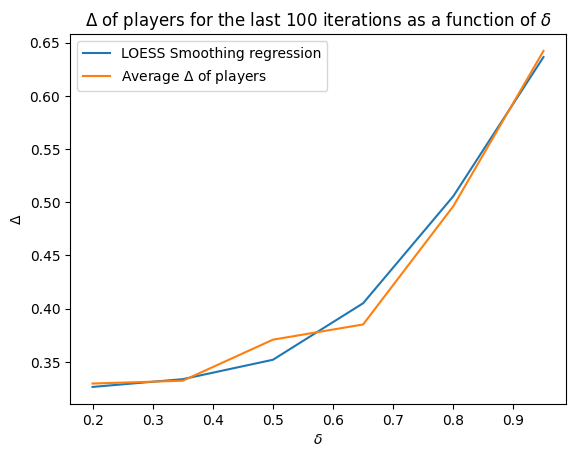

In [6]:
agg = np.array(aggregated_agents).mean(axis=1)
delta = [0.20, 0.35, 0.50, 0.65, 0.80, 0.95]
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit

    
Rmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0])))
DRmean = np.zeros((len(aggregated_agents), len(aggregated_agents[0]), len(aggregated_agents[0][0][0]))) 

agg_Rmean = np.zeros((len(aggregated_agents), 2))
agg_DRmean = np.zeros((len(aggregated_agents), 2))  

# Parameters
n_params = len(aggregated_agents)

X = []
Y = []

handles = []
labels = []
# Loop through each parameter  
for param_ind in range(n_params):

  # Loop through each sample
  for sample_ind in range(len(aggregated_agents[0])):
    for j in range (2):
      Rmean[param_ind][sample_ind][j] = aggregated_agents[param_ind][sample_ind][-100:,j].mean()
      DRmean[param_ind][sample_ind][j] = (Rmean[param_ind][sample_ind][j] - RN)/(RC - RN) 
      agg_Rmean[param_ind][j] = agg[param_ind][-100:,j].mean()
      agg_DRmean[param_ind][j] = (agg_Rmean[param_ind][j] - RN)/(RC - RN) 
    
   
    # # Plot the point
    # h1 = plt.scatter(delta[param_ind], DRmean[param_ind][sample_ind][0], marker='o', 
    #                  facecolor='none', edgecolor='b', alpha=0.5, label='player1')
    # if param_ind==0 and sample_ind == 0:
    #   handles.append(h1)
    #   labels.append('player 1')
    
    # h2 = plt.scatter(delta[param_ind], DRmean[param_ind][sample_ind][1],
    #             marker='o', facecolor='none', edgecolor='r', alpha=0.5, label='player2')
    # if param_ind==0 and sample_ind == 0:
    #   handles.append(h2)
    #   labels.append('player 2')
    
    X.append(delta[param_ind])
    X.append(delta[param_ind])
    Y.append(DRmean[param_ind][sample_ind][0])
    Y.append(DRmean[param_ind][sample_ind][1])
    

  # End of sample loop
reg = lowess.lowess(Y, X)[:,1]
h3 = plt.plot(X,reg, label = 'LOESS Smoothing regression')
handles.append(h3) 
labels.append('LOESS Smoothing regression')

av = np.mean(agg_DRmean, axis=1)
h4 = plt.plot(delta,av, label='Average $\\Delta$ of players')
handles.append(h4) 
labels.append('Average $\\Delta$ of players')

plt.xlabel('$\\delta$')
plt.ylabel('$\\Delta$')
plt.title('$\\Delta$ of players for the last 100 iterations as a function of $\\delta$')

handles = [handle[0] if type(handle)==list else handle for handle in handles]#in each list take all elements
labels = [label[0] if type(label)==list else label for label in labels]

plt.legend(handles, labels)
plt.show()